<a href="https://colab.research.google.com/github/bryaanabraham/Wandering_Guardian/blob/main/Sample%20Curve%20Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd

df = pd.read_csv("go_track_trackspoints.csv")
df.dropna(how='all', inplace=True)
df.head(10)



,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21


In [60]:
import math

def gps_to_cartesian(floatlatitude, longitude):
    # Radius of the Earth in meters
    R = 6371000

    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(floatlatitude)
    lon_rad = math.radians(longitude)

    # Convert latitude and longitude to Cartesian coordinates
    x = R * math.cos(lat_rad) * math.cos(lon_rad)
    y = R * math.cos(lat_rad) * math.sin(lon_rad)

    return x, y

# Apply the gps_to_cartesian function to each row of the DataFrame
df['x'], df['y'] = zip(*df.apply(lambda row: gps_to_cartesian(row['latitude'], row['longitude']), axis=1))

# Display the modified DataFrame
df.head(100)


,id,latitude,longitude,track_id,time,x,y
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32,4.991524e+06,-3.769960e+06
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37,4.991524e+06,-3.769960e+06
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42,4.991523e+06,-3.769962e+06
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47,4.991519e+06,-3.769970e+06
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53,4.991521e+06,-3.769977e+06
...,...,...,...,...,...,...,...
95,96,-10.938603,-37.062964,2,2014-09-13 13:38:22,4.991522e+06,-3.769989e+06
96,97,-10.938358,-37.062790,2,2014-09-13 13:38:27,4.991537e+06,-3.769976e+06
97,98,-10.938293,-37.062372,2,2014-09-13 13:38:32,4.991566e+06,-3.769941e+06
98,99,-10.938544,-37.061762,2,2014-09-13 13:38:38,4.991602e+06,-3.769885e+06


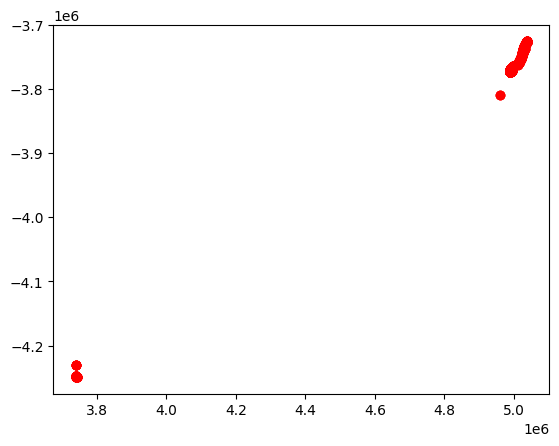

In [59]:
plt.scatter(df['x'], df['y'], label='GPS Data', color='red')

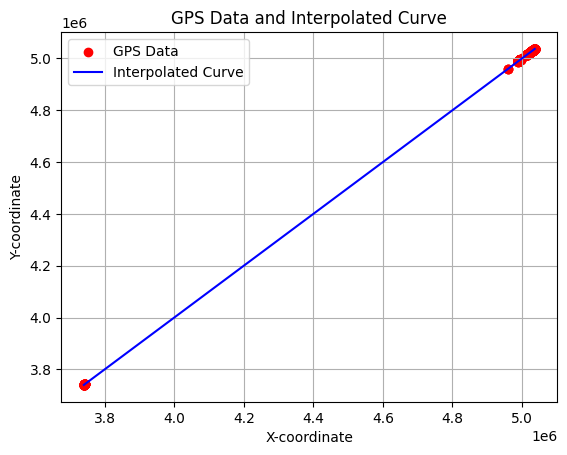

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Assuming gps_data is a list of tuples (x, y) representing GPS coordinates
# Relative to the "home" location
gps_data = (df['x'], df['y'])  # Corrected tuple format


# Remove duplicate x coordinates
unique_indices = np.unique(df['x'], return_index=True)[1]
x_coords_unique = df['x'][unique_indices]
y_coords_unique = df['x'][unique_indices]

# Perform cubic spline interpolation
spline_func = interp1d(x_coords_unique, y_coords_unique)

# Generate a set of interpolated points along the curve
interpolated_x = np.linspace(min(x_coords_unique), max(x_coords_unique), num=100)
interpolated_y = spline_func(interpolated_x)

# Plot the original GPS data points
plt.scatter(x_coords_unique, y_coords_unique, label='GPS Data', color='red')

# Plot the interpolated curve
plt.plot(interpolated_x, interpolated_y, label='Interpolated Curve', color='blue')

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('GPS Data and Interpolated Curve')
plt.legend()
plt.grid(True)
plt.show()
